In [ ]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
image_path = '/content/gdrive/MyDrive/fish_data/test/images/image_with_aruko_marker_2.jpeg'
annotation_file = '/content/gdrive/MyDrive/fish_jpg.rf.e13431ffea3692128950c141529f9dac.txt'

In [ ]:
image = cv2.imread(image_path)
original_image = image.copy()
#image = cv2_imshow(image)

height, width, channels = image.shape

In [ ]:
parameters = cv2.aruco.DetectorParameters()
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
corners, _, _ = cv2.aruco.detectMarkers(image, aruco_dict, parameters=parameters)

int_corners = np.int0(corners)
cv2.polylines(image, int_corners, True, (225, 255, 0), 2)


#pixel-to-cm conversion
aruco_perimeter = cv2.arcLength(corners[0], True)
pixel_cm_ratio = aruco_perimeter / 20

In [ ]:
image = cv2.imread(image_path)
original_image = image.copy()
#image = cv2_imshow(image)

height, width, channels = image.shape

# Read annotation file
with open(annotation_file, 'r') as file:
    annotations = file.readlines()

# Draw rectangles based on annotations
for annotation in annotations:
    data = annotation.strip().split(' ')
    object_name = data[0]
    xmin, ymin, w, h = map(float, data[1:])

    object_length = abs((int(w*(width))/pixel_cm_ratio))

    cv2.rectangle(image, (int(xmin*(width-175)), int(ymin*(height-75))), (int(w*(width-175))+int(xmin*(width-175)), int(h*(height-75))+int(ymin*(height-75))), (0, 255, 0), 3)
    cv2.putText(image, "Length {} cm".format(round(object_length, 1)), (int(xmin*(width-175)), int(ymin*(height-75))), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255), 2)



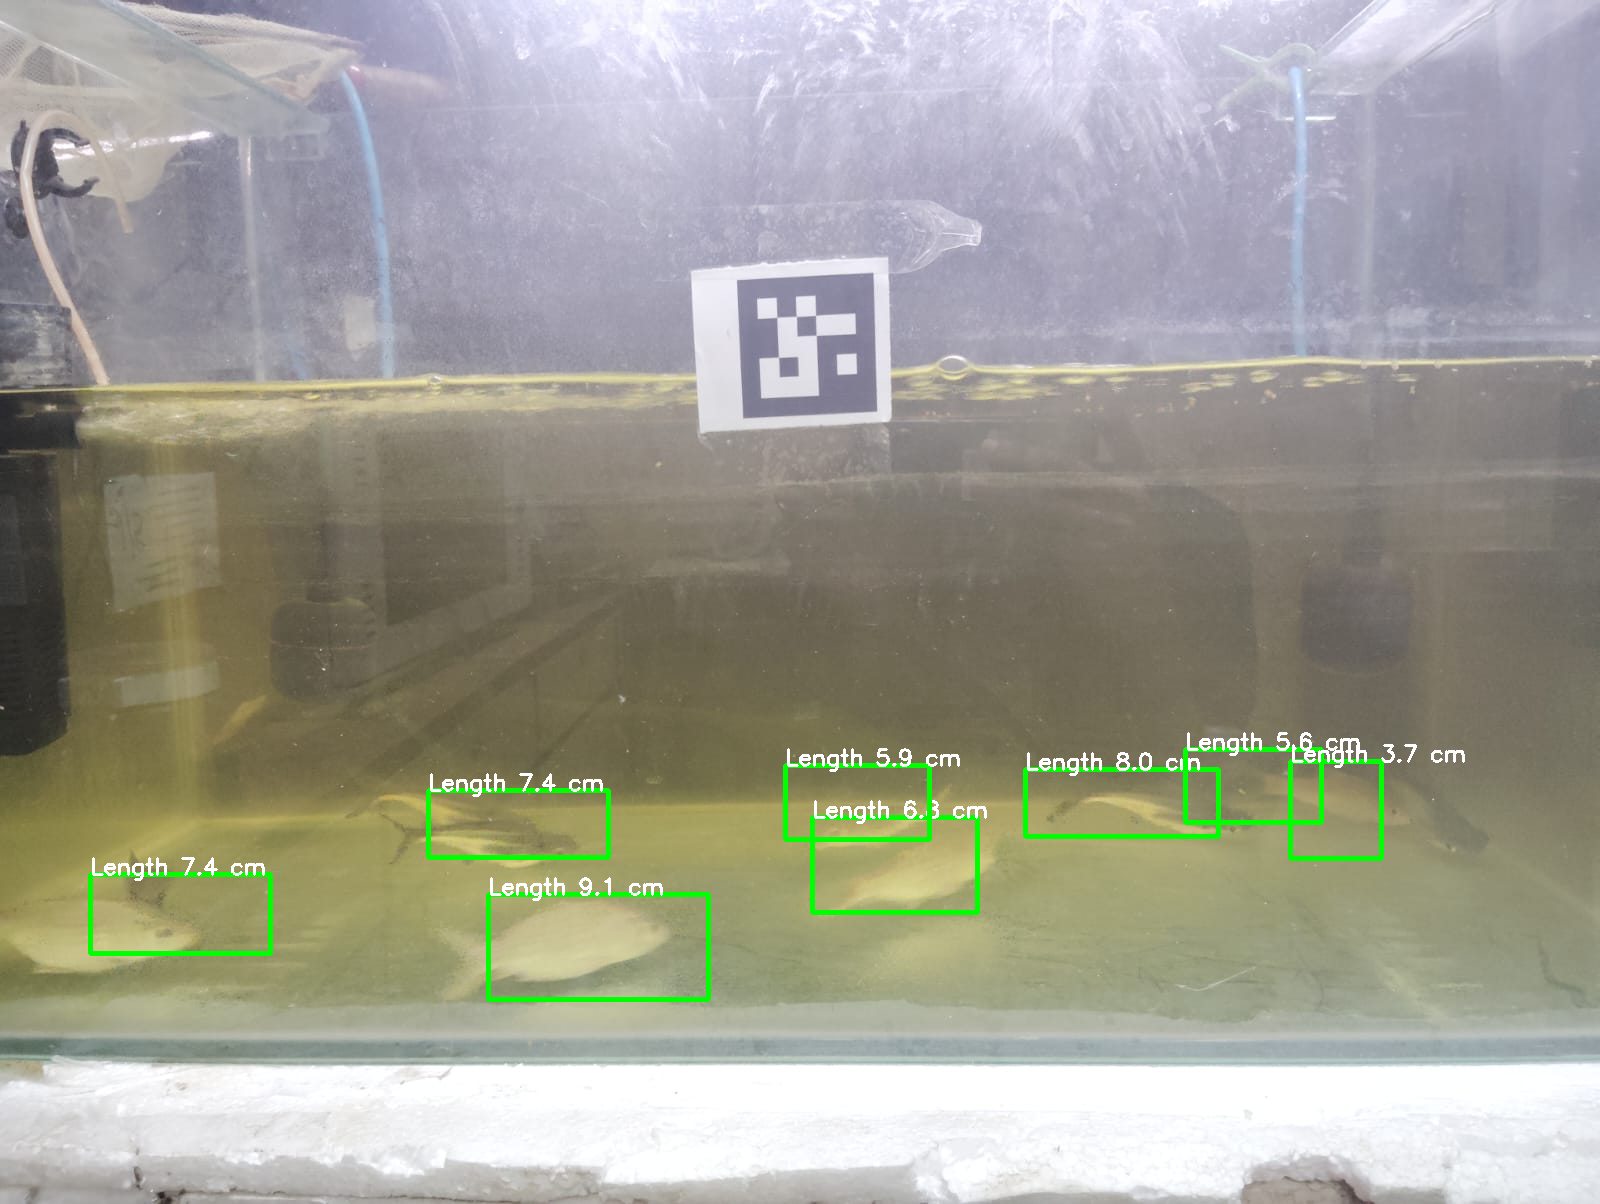

In [ ]:
image = cv2_imshow(image)

In [ ]:
'''
image_path = '/content/gdrive/MyDrive/fish_data/test/images/image_with_aruko_marker_3.jpeg'
original_image = cv2.imread(image_path)
image = original_image.copy()

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=30, threshold2=100)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10:  # Filter based on contour area
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangles around objects
'''